# Projeto 3 - Clusterização de dados de vendas de produtos
## Wholesale customers Data Set - UCI

## Introdução

O conjunto de dados de vendas esta localizado na plataforma UCI no seguinte link - https://archive.ics.uci.edu/ml/datasets/Wholesale+customers. Este é um conjunto de dados que não possui rotulo, o nosso desafio será agrupar essas vendas em grupos e avaliar estes grupos.

Segue a descrição das variaveis:
- FRESH: gastos anuais em produtos frescos
- MILK: gastos anuais em produtos lácteos
- GROCERY: gastos anuais em produtos de mercearia
- FROZEN: gastos anuais em produtos congelados
- DETERGENTS_PAPER: gastos anuais em detergentes e produtos de papel
- DELICATESSEN: gastos anuais em produtos artesanais (queijos, vinhos, doces)
- CHANNEL: origem do cliente - Horeca (Hotel/Restaurante/Café) (1) ou canais de varejo (2)
- REGION: região do cliente Lisbon (1), Oporto (2) or Other Region (3)

#### referencia: 
Abreu, N. (2011). Analise do perfil do cliente Recheio e desenvolvimento de um sistema promocional. Mestrado em Marketing, ISCTE-IUL, Lisbon

# Sobre este projeto

Neste projeto treine os conhecimentos aprendidos até o momento e que entenda algumas das dificuldades que pode ter quando for aplicar os mesmos. 

Os principais pontos que serão avaliados:

- Levantamento de hipoteses
- Manipulação de dados e criação de gráficos simples com o `Pandas`
- Criar um modelo clusterização e justificar

# Preparação do ambiente

- Acessem o link - https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv e faça o download do conjunto de dados.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv('./Wholesale customers data.csv')

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [5]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [6]:
data.columns = [
            'canal',
            'regiao',
            'frescos',
            'laticinios',
            'mercearia',
            'congelados',
            'limpeza',
            'artesanais'
        ]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   canal       440 non-null    int64
 1   regiao      440 non-null    int64
 2   frescos     440 non-null    int64
 3   laticinios  440 non-null    int64
 4   mercearia   440 non-null    int64
 5   congelados  440 non-null    int64
 6   limpeza     440 non-null    int64
 7   artesanais  440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [8]:
data.describe()

,canal,regiao,frescos,laticinios,mercearia,congelados,limpeza,artesanais
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


<AxesSubplot:>

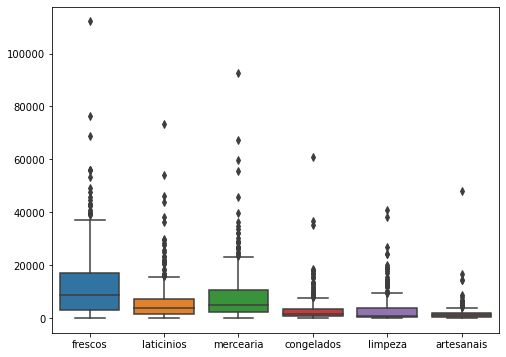

In [9]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data.drop(['canal', 'regiao'], axis=1))

**Salvando o dataframe caso necessário mais à frente**

In [10]:
_data = data

# Exercicio 1. (3.0 pontos)

Faça um gráfico de cotovelo, quantos clusters aproximadamente melhor separam este conjunto de dados informado pelo grafico de cotovelo?

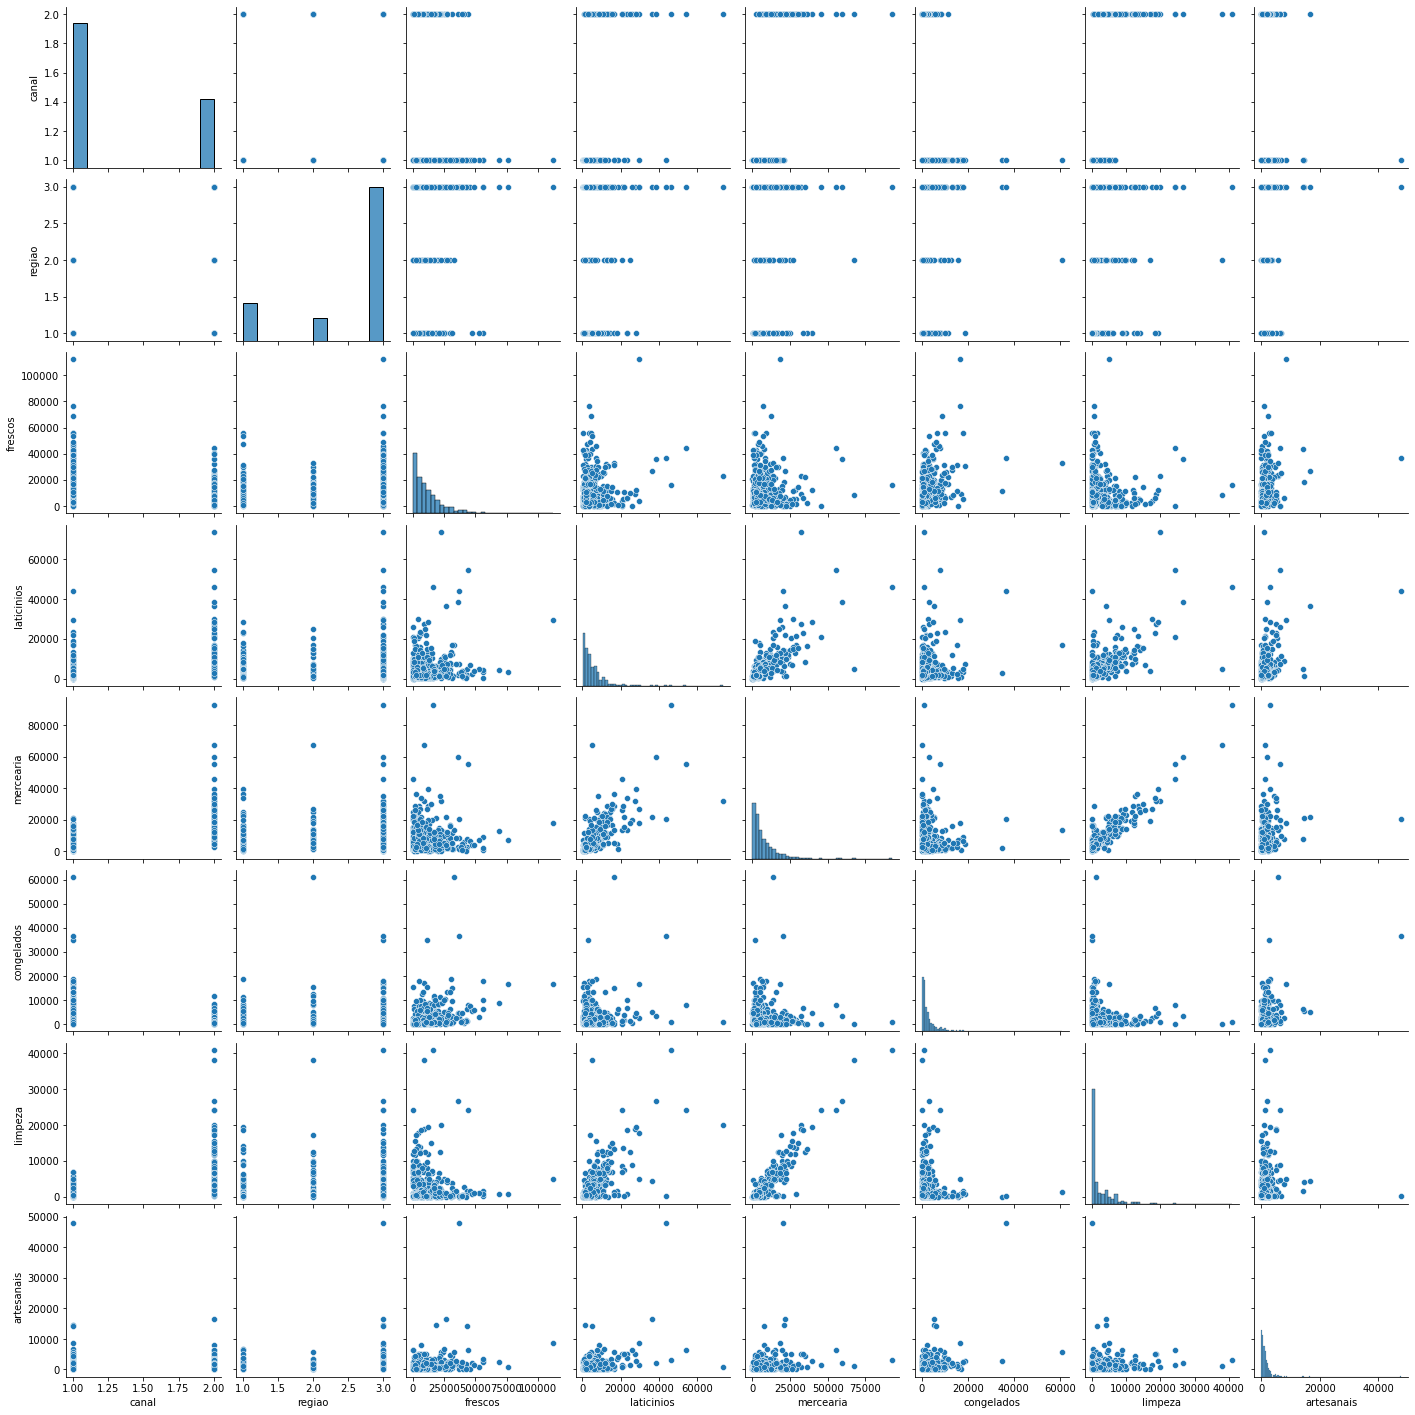

In [11]:
#### VALE 0.5 pontos
#### CONSTRUA OS SEUS GRAFICOS ABAIXO, USE MAIS CELULAS SE NECESSARIO
# sns.pairplot(data=data.drop(['canal', 'regiao'], axis=1))
sns.pairplot(data=data)

**Separando as variáveis categóricas das contínuas**

In [12]:
categorical_features = data.loc[:,['canal', 'regiao']]
continuous_features = data.drop(['canal', 'regiao'], axis=1)

**Gerando vaiáveis dummies**

In [13]:
for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()

,frescos,laticinios,mercearia,congelados,limpeza,artesanais,canal_1,canal_2,regiao_1,regiao_2,regiao_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


**Vamos usar o MinMaxScaler como scaler por causa dos dummies binários para que o resto dos valores estejam entre 0 e 1**

In [14]:
mms = MinMaxScaler()
mms.fit(data)
X = mms.transform(data)

In [46]:
def calculate_wcss(data_frame):
    wcss = []
    s_scores = []
    for n in range(2, 16):
        kmeans = KMeans(n_clusters=n, random_state=10)
        kmeans.fit(X=data_frame)
        wcss.append(kmeans.inertia_)
        
        # otimizando o número de k pelo silhouette_score
        labels = kmeans.labels_
        s_score = silhouette_score(data_frame, labels, metric='euclidean')
        s_scores.append(s_score)
        k = s_scores.index(max(s_scores))+2  # +2 para compensar o range(2, 16), pois começa em 2 e o index em 0
    
    return [wcss, k]

In [47]:
elbow, k = calculate_wcss(X)
print('k pelo silhouette score: ', k)

k pelo silhouette score:  6


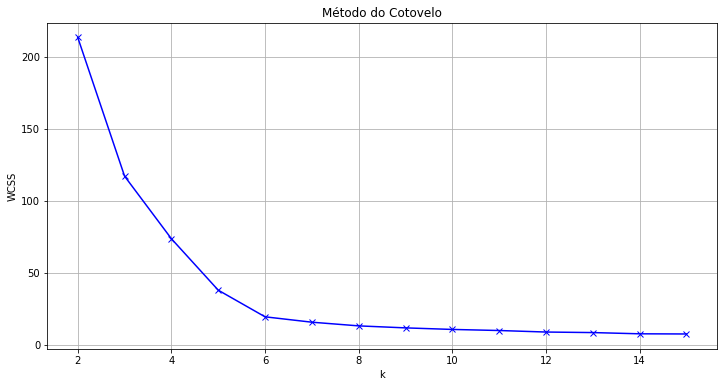

In [17]:
plt.figure(figsize=(12,6))
plt.grid(visible=True)
plt.plot(np.arange(1, len(elbow)+1)+1, elbow, '-bx')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title("Método do Cotovelo")
plt.show()

**Resultado para o melhor número de K**

Pelo gráfico do cotovelo, o melhor número de k seria 6, confirmado pelo k calculado pelo silhouette score.

In [18]:
print('Melhor número de clusteres: ', k)

Melhor número de clusteres:  6


Construa um modelo de **clusterização K-Médias** usando o melhor numero de clusters informado pelo gráfico de cotovelo e usem o parametro **random_state** com valor 10.

In [19]:
#### VALE 0.5 pontos
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

kmeans = KMeans(n_clusters=k, random_state=10)
kmeans.fit(X)
pred = kmeans.predict(X)
pred

array([2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 0, 5,
       0, 0, 5, 5, 0, 0, 0, 5, 0, 5, 0, 5, 0, 5, 0, 0, 5, 0, 5, 0, 5, 0,
       0, 0, 0, 5, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 5, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       5, 0, 5, 0, 5, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 3, 4, 3, 4, 4, 3, 4,

Adicione o resultado da clusterização no conjunto de dados original, chame essa nova variavel de **cluster** e conte quantas observações há em cada cluster e preencha:

In [20]:
#### VALE 0.5 pontos
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO
klustered_data = data
klustered_data['cluster'] = pred

In [21]:
klustered_data.head()

,frescos,laticinios,mercearia,congelados,limpeza,artesanais,canal_1,canal_2,regiao_1,regiao_2,regiao_3,cluster
0,12669,9656,7561,214,2674,1338,0,1,0,0,1,2
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1,2
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1,2
3,13265,1196,4221,6404,507,1788,1,0,0,0,1,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1,2


In [22]:
kd = klustered_data['cluster'].value_counts()
kd

1    211
2    105
0     59
3     28
4     19
5     18
Name: cluster, dtype: int64

In [23]:
#### VALE 0.5 pontos
# Substitua __ pelos valores solicitados
for r in range(len(kd)):
    print('Total de observações do cluster {}: {}'.format(r+1, kd.loc[r]))

# print('Total de observações do cluster 1: {}'.format(kd.loc[0]))
# print('Total de observações do cluster 2: {}'.format(kd.loc[1]))
# print('Total de observações do cluster 3: {}'.format(kd.loc[2]))
# print('Total de observações do cluster 4: {}'.format(kd.loc[3]))
# print('Total de observações do cluster 5: {}'.format(kd.loc[4]))
# print('Total de observações do cluster 6: {}'.format(kd.loc[5]))
# copie a linha de cima, alterando o cluster e preenchendo o total

Total de observações do cluster 1: 59
Total de observações do cluster 2: 211
Total de observações do cluster 3: 105
Total de observações do cluster 4: 28
Total de observações do cluster 5: 19
Total de observações do cluster 6: 18


# Exercicio 2. (4.0 pontos)

Escolha dois clusters e separe os dados em dois subconjuntos, chamando-os de clusterA e clusterB.

In [24]:
#### VALE 1.0 ponto
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

# adicionando a informação dos clusteres no dataset original traduzido
data_k = _data
data_k['cluster'] = pred

**usaremsos os clusteres 2 e 3 (index 1 e 2, respectivamente)**

In [25]:
clusterA = data_k[data_k['cluster'] == 1]
clusterB = data_k[data_k['cluster'] == 2]

In [26]:
clusterA.head()

,canal,regiao,frescos,laticinios,mercearia,congelados,limpeza,artesanais,cluster
3,1,3,13265,1196,4221,6404,507,1788,1
8,1,3,5963,3648,6192,425,1716,750,1
15,1,3,10253,1114,3821,397,964,412,1
17,1,3,5876,6157,2933,839,370,4478,1
19,1,3,7780,2495,9464,669,2518,501,1


In [27]:
clusterA.tail()

,canal,regiao,frescos,laticinios,mercearia,congelados,limpeza,artesanais,cluster
434,1,3,16731,3922,7994,688,2371,838,1
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
438,1,3,10290,1981,2232,1038,168,2125,1
439,1,3,2787,1698,2510,65,477,52,1


Verificando a coluna ``canal`` e ``regiao``, há a possibilidade de serem as mesmas para todos os valores, por isso, vamos fazer uma contagem:

In [28]:
clusterA.loc[(clusterA['canal']==1) & (clusterA['regiao']==3)].count()

canal         211
regiao        211
frescos       211
laticinios    211
mercearia     211
congelados    211
limpeza       211
artesanais    211
cluster       211
dtype: int64

In [29]:
clusterB.head()

,canal,regiao,frescos,laticinios,mercearia,congelados,limpeza,artesanais,cluster
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
4,2,3,22615,5410,7198,3915,1777,5185,2
5,2,3,9413,8259,5126,666,1795,1451,2


In [30]:
clusterB.tail()

,canal,regiao,frescos,laticinios,mercearia,congelados,limpeza,artesanais,cluster
418,2,3,660,8494,18622,133,6740,776,2
421,2,3,17063,4847,9053,1031,3415,1784,2
423,2,3,17565,3686,4657,1059,1803,668,2
424,2,3,16980,2884,12232,874,3213,249,2
437,2,3,14531,15488,30243,437,14841,1867,2


Contagem de ``canal`` e ``regiao`` para o **cluster B**.

In [31]:
clusterB.loc[(clusterB['canal']==2) & (clusterB['regiao']==3)].count()

canal         105
regiao        105
frescos       105
laticinios    105
mercearia     105
congelados    105
limpeza       105
artesanais    105
cluster       105
dtype: int64

Utilizaremos a função **.describe()** para obtermos as medidas de média, desvio padrão, valor minimo e valor máximo dos subconjuntos clusterA e clusterB

In [32]:
#### VALE 1.0 ponto
#### EXECUTE O COMANDO ABAIXO PARA clusterA

clusterA.describe()

,canal,regiao,frescos,laticinios,mercearia,congelados,limpeza,artesanais,cluster
count,211.0,211.0,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.0
mean,1.0,3.0,13878.052133,3486.981043,3886.734597,3656.900474,786.682464,1518.284360,1.0
std,0.0,0.0,14746.572913,4508.505269,3593.506056,4956.590848,1099.970640,3663.183304,0.0
min,1.0,3.0,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,1.0
25%,1.0,3.0,3702.500000,1188.500000,1666.000000,779.000000,176.500000,378.500000,1.0
50%,1.0,3.0,9612.000000,2247.000000,2642.000000,1960.000000,375.000000,823.000000,1.0
75%,1.0,3.0,18821.000000,4205.000000,4927.500000,4542.500000,948.500000,1582.000000,1.0
max,1.0,3.0,112151.000000,43950.000000,21042.000000,36534.000000,6907.000000,47943.000000,1.0


In [33]:
clusterA.value_counts()

canal  regiao  frescos  laticinios  mercearia  congelados  limpeza  artesanais  cluster
1      3       3        2920        6252       440         223      709         1          1
               18827    3677        1988       118         516      201         1          1
               13624    295         1381       890         43       84          1          1
               13779    1970        1648       596         227      436         1          1
               14039    7393        2548       6386        1333     2341        1          1
                                                                                          ..
               5963     3648        6192       425         1716     750         1          1
               5969     1990        3417       5679        1135     290         1          1
               6022     3354        3261       2507        212      686         1          1
               6137     5360        8040       129         3084     1603   

In [34]:
#### VALE 1.0 ponto
#### EXECUTE O COMANDO ABAIXO PARA clusterB

clusterB.describe()

,canal,regiao,frescos,laticinios,mercearia,congelados,limpeza,artesanais,cluster
count,105.0,105.0,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.0
mean,2.0,3.0,9831.504762,10981.009524,15953.809524,1513.200000,6899.238095,1826.209524,2.0
std,0.0,0.0,9635.394129,10574.827178,12298.935356,1504.498737,6022.091110,2119.052222,0.0
min,2.0,3.0,23.000000,1124.000000,4523.000000,33.000000,523.000000,3.000000,2.0
25%,2.0,3.0,2343.000000,6128.000000,9170.000000,437.000000,3537.000000,545.000000,2.0
50%,2.0,3.0,7362.000000,7845.000000,12121.000000,1059.000000,5121.000000,1386.000000,2.0
75%,2.0,3.0,15076.000000,11114.000000,19805.000000,2194.000000,7677.000000,2158.000000,2.0
max,2.0,3.0,44466.000000,73498.000000,92780.000000,8132.000000,40827.000000,16523.000000,2.0


In [35]:
clusterB.value_counts()

canal  regiao  frescos  laticinios  mercearia  congelados  limpeza  artesanais  cluster
2      3       23       2616        8118       145         3874     217         2          1
               7579     4956        9426       1669        3321     2566        2          1
               14531    15488       30243      437         14841    1867        2          1
               13146    1124        4523       1420        549      497         2          1
               12669    9656        7561       214         2674     1338        2          1
                                                                                          ..
               3366     5403        12974      4400        5977     1744        2          1
               3136     8630        13586      5641        4666     1426        2          1
               3103     14069       21955      1668        6792     1452        2          1
               2932     6459        7677       2561        4573     1386   

In [36]:
maximos = pd.DataFrame([clusterA.max(), clusterB.max()], index=['A','B']).drop(['canal', 'regiao', 'cluster'], axis=1).T
minimos = pd.DataFrame([clusterA.min(), clusterB.min()], index=['A','B']).drop(['canal', 'regiao', 'cluster'], axis=1).T
desvio_padrao = pd.DataFrame([clusterA.std(), clusterB.std()], index=['A','B']).drop(['canal', 'regiao', 'cluster'], axis=1).T
medias = pd.DataFrame([clusterA.mean(), clusterB.mean()], index=['A','B']).drop(['canal', 'regiao', 'cluster'], axis=1).T

In [37]:
maximos

,A,B
frescos,112151,44466
laticinios,43950,73498
mercearia,21042,92780
congelados,36534,8132
limpeza,6907,40827
artesanais,47943,16523


In [38]:
minimos

,A,B
frescos,3,23
laticinios,55,1124
mercearia,3,4523
congelados,25,33
limpeza,3,523
artesanais,3,3


In [39]:
desvio_padrao

,A,B
frescos,14746.572913,9635.394129
laticinios,4508.505269,10574.827178
mercearia,3593.506056,12298.935356
congelados,4956.590848,1504.498737
limpeza,1099.970640,6022.091110
artesanais,3663.183304,2119.052222


In [40]:
medias

,A,B
frescos,13878.052133,9831.504762
laticinios,3486.981043,10981.009524
mercearia,3886.734597,15953.809524
congelados,3656.900474,1513.200000
limpeza,786.682464,6899.238095
artesanais,1518.284360,1826.209524


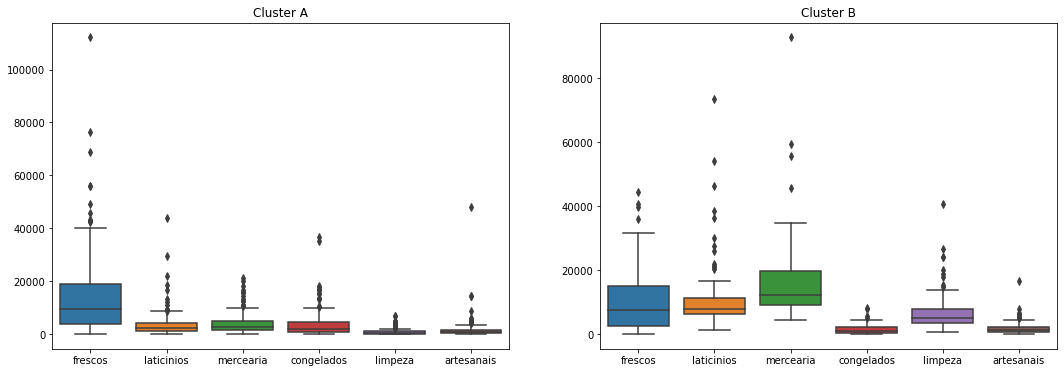

In [41]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.boxplot(data=clusterA.drop(['canal', 'regiao', 'cluster'], axis=1))
plt.title('Cluster A')

plt.subplot(1,2,2)
sns.boxplot(data=clusterB.drop(['canal', 'regiao', 'cluster'], axis=1))
plt.title('Cluster B')

plt.show()

Comparando as médias, valores minimos e máximos obtidos, há diferença entre o subconjunto clusterA e clusterB?

**RESPOSTA** (VALE 0.5 pontos): (responda aqui, dê dois cliques para editar)

**R:** Sim, há diferenças. Os clusteres A e B são os maiores do dataset, com 211 e 105 obeservações respectivamente.
Há muitas diferenças entre os perfis A e B, como por exemplo, o consumo de laticínios, mercearia e produtos de limpeza do **cluster B** é signitivamente maior do que do **cluster A** enquanto que ao mesmo tempo, o **cluster A** consome mais congelados.

O mais interessante é que todos os consumidores do **cluster A**, tem canal de compras 1 e região 3, ou seja, "HORECA" e "Outras Regiões", enquanto que o **cluster B**, tem canal de compras 2 e região 3, ou seja "Varejo" e "Outras Regiões". 

Sendo dois agrupamentos distintos, qual rotulo poderiamos utilizar para identifica-los? Justifique a sua resposta

**RESPOSTA** (VALE 0.5 pontos): (responda aqui, dê dois cliques para editar)

**R:** Seria necessário uma análise dos outros clusteres, mas poderíamos identifica-los a priori pela região e canal de venda, uma vez que **todos** os consumidores do **cluster A**, tem canal de compras 1 e região 3, ou seja, "HORECA" e "Outras Regiões", enquanto que o **cluster B**, **todos** tem canal de compras 2 e região 3, ou seja "Varejo" e outras regiões. como por exemplo **cluster A** em "Outras Regiões - HORECA" e o **cluster B** em "Outras Regiões - Varejo".

Agrupando por canal e região:

In [42]:
data_k.groupby(['canal', 'regiao']).count()[['cluster']]

cluster
canal regiao         
1     1            59
      2            28
      3           211
2     1            18
      2            19
      3           105

Puxando a contagem dos ítens clusterizados ``kd`` estanciada anteriormente, nota-se que o número de observações agrupados correspondem ao número de ítens em cada cluster conabilizados em ``kd``, o que faz muito sentido.

In [43]:
kd

1    211
2    105
0     59
3     28
4     19
5     18
Name: cluster, dtype: int64

É de se levantar hipótese de que não seja necessário passar os dados por ML para obter os clusteres. Isto devido a originalmente o dataset ser dividido pelas regiões e canais de compra e automaticamente classificados na captação.

O resultado casa bem demais com os dados, o que levanta a possibilidade da análise estar enviesada.

# Exercicio 3. (3 pontos)

Responda, quais são as vantagens e desvantagens do algoritmo K-Médias?

**RESPOSTA** (VALE 1.0 ponto): (responda aqui, dê dois cliques para editar)

**Vantagens:**
- fácil implementação
- escalonável para grande conjunto de dados
- mais rápido quanto maior for o conjunto de dados
- possibilidade de determinar o custo computacional (na escolha do númer de clusteres)
- adaptar novos exemplos com muita frequencia
- generalização dos clusteres para diferentes formas e tamanhos

**Desvantagens:**
- Sensível a outliers
- precisa de um número prévio (escolha de número de clusteres)
- escolha do número de clusteres é um tanto quanto complexo.
- conforme o número de dimensões aumenta, sua escalabilidade diminui

Quantos elementos há em cada clusters se o numero de clusters for igual ao total de observações?

**RESPOSTA** (VALE 1.0 ponto): (responda aqui, dê dois cliques para editar)

**R:** Com n centroides em um dataset com n observações haverá apenas 1 elemento em cada cluster, sendo cada elemento, seu próprio centróide de seu próprio grupo e não haverá nenhum elemento perto o suficiente para ser agrupado.

Se o parametro **k** for igual a 1, quantos clusters teremos e quantos elementos há em cada cluster?

**RESPOSTA** (VALE 1.0 ponto): (responda aqui, dê dois cliques para editar)

**R:** Teremos todos os elementos em apenas 1 cluster pois haverá apenas 1 centróide.

A inicialização dos centroides afeta o algoritmo K-Médias?

**RESPOSTA** (VALE 1.0 ponto): (responda aqui, dê dois cliques para editar)

**R:** O centróide em si não, mas o número de centróides sim. O número de centróides é um parâmetro que afeta diretamento no desempenho do modelo. Abaixo do ideal, as observações no cluster podem possuir diferenças significativas entre si, acima do número ideal, obervações matematicamente semelhantes podem ser separadas em clusteres diferentes.